# Pre-processing & Classification Try-Outs

## Datasets

- ~~Full~~
- ~~Cleaned~~
- ~~Cleaned+MinMaxScaled~~
- ~~Cleaned+RobustScaled~~
- ~~Cleaned+QuantileTransformed~~
- Cleaned+Extended+MinMaxScaled
- Cleaned+CleanExtended+MinMaxScaled
- v4 (?)
- v5 (mixed with MNIST digits)
- v6 (Automatic Feature Selection)

## Classifiers

- ~~RandomForest~~
- SVM/C
- kNN
- ~~SGD~~

## Winner

SVM/C `kernel='rbf', C=3.8, gamma=0.1` with v6

In [7]:
# IMPORTS AND NOTEBOOK SETUP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=1.5, gamma=0.2` | Cleaned+Extended+MinMaxScaled | `0.98541666666666672`
2 |1 |SVM/C | `kernel='rbf', C=8.7, gamma=0.04` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`
3 |1 |kNN | `n_neigbors=3` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`
4 |1 |SVM/C | `kernel='rbf', C=3.0, gamma=0.2` | Cleaned+CleanExtended+MinMaxScaled | `0.97916666666666663`

Default options:

- Scikit Learn train/test split ratio: `.25`.
- Normalizing all columns but `num_holes`.

## outdated

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=6.6, gamma=0.35` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `kernel='rbf', C=3.9, gamma=0.59` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `C=2.0` | Cleaned+MinMaxScaled | `0.973958333333`
2 |1 |SVM/C | `C=4.9` | Cleaned+RobustScaled | `0.973958333333`
3 |3 |SVM/C | `kernel='rbf', C=3.9` | Cleaned+MinMaxScaled | `0.967391304347`
4 |3 |SVM/C | `kernel='sigmoid', C=9.6` | Cleaned+MinMaxScaled | `0.967391304347`
5 |5 |RandomForest | `n_estimators=70` | Cleaned | `0.953125000000`
6 |5 |RandomForest | `n_estimators=70` | Cleaned+MinMaxScaled | `0.953125000000`
7 |5 |SVM/C | `C=2.6` | Cleaned+QuantileTransformed | `0.953125000000`
8 |8 |SVM/C | `C=4.3` | Cleaned | `0.947916666667`
9 |8 |RandomForest | `n_estimators=16` | Cleaned+RobustScaled | `0.947916666667`
10|8 |RandomForest | `n_estimators=32` | Cleaned+QuantileTransformed | `0.947916666667`
11|11|RandomForest | `n_estimators=90` | Full | `0.942708333333`
12|12|SVM/C | `default` | Full | `0.932291666667`

Default options:

- RandomForest with `n_estimators=50`, `oob_score=True` and `random_state=123456`.
- SVM/C with `kernel=linear`, `C=1.0`.

Normalizing all columns but `num_holes`.

In [13]:
# IMPORTING OUR DATASET
data_full = pd.read_csv('../dataset-numpy/dataset.csv')
data_clean_manual = pd.read_csv('../dataset-numpy/dataset-clean-manual.csv')
data_ext_clean_manual = pd.read_csv('../dataset-numpy/dataset-extended-clean-manual.csv')
data_v4 = pd.read_csv('../dataset-numpy/dataset-v4.csv')
data_v6 = pd.read_csv('../dataset-numpy/dataset-v6.csv')
data_v7 = pd.read_csv('../dataset-numpy/dataset-clean-v7.csv')
data_v8 = pd.read_csv('../dataset-numpy/dataset-v8.csv')

## Normalization

In [14]:
less_columns = data_clean_manual.columns.values
columns_v4 = data_v4.columns.values
columns_v6 = data_v6.columns.values
columns_v7 = data_v7.columns.values
columns_v8 = data_v8.columns.values
columns_to_not_normalize = ['num_holes', 'label']

columns_v4_to_normalize = [c for c in columns_v4 if not c in columns_to_not_normalize]
columns_v6_to_normalize = [c for c in columns_v6 if not c in columns_to_not_normalize]
columns_v7_to_normalize = [c for c in columns_v7 if not c in columns_to_not_normalize]
columns_v8_to_normalize = [c for c in columns_v8 if not c in columns_to_not_normalize]
less_columns_to_normalize = [c for c in less_columns if not c in columns_to_not_normalize]
        
def scale(data, scaler, columns):
    return pd.DataFrame(scaler.fit_transform(data[columns]), columns=columns)

### MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaled = data_clean_manual.copy()
minmaxscaled[less_columns_to_normalize] = scale(data_clean_manual, MinMaxScaler(), less_columns_to_normalize)

minmaxscaled_ext = data_ext_clean_manual.copy()
minmaxscaled_ext[columns_v4_to_normalize] = scale(data_ext_clean_manual, MinMaxScaler(), columns_v4_to_normalize)

scaled_v4 = data_v4.copy()
scaled_v4[columns_v4_to_normalize] = scale(data_v4, MinMaxScaler(), columns_v4_to_normalize)

scaled_v6 = data_v6.copy()
scaled_v6[columns_v6_to_normalize] = scale(data_v6, MinMaxScaler(), columns_v6_to_normalize)

scaled_v7 = data_v7.copy()
scaled_v7[columns_v7_to_normalize] = scale(data_v7, MinMaxScaler(), columns_v7_to_normalize)

scaled_v8 = data_v8.copy()
scaled_v8[columns_v8_to_normalize] = scale(data_v8, MinMaxScaler(), columns_v8_to_normalize)

# del scaled_v7['area']
# del scaled_v7['contours']
# del scaled_v7['radius']
# del scaled_v7['hull_radius']
# del scaled_v7['angle']
# del scaled_v7['corners']
# del scaled_v7['circles']
# del scaled_v7['centroid_x']
# del scaled_v7['centroid_y']
# del scaled_v7['num_holes']

print minmaxscaled.shape, minmaxscaled_ext.shape, scaled_v4.shape, scaled_v6.shape, scaled_v7.shape, scaled_v8.shape
print scaled_v6.columns
print scaled_v7.columns
print scaled_v8.columns

(1920, 24) (1920, 72) (1920, 60) (1920, 56) (1920, 58) (1920, 79)
Index([u'area', u'contours', u'radius', u'hull_radius', u'centroid_x',
       u'centroid_y', u'angle', u'weight_0_2', u'weight_0_3', u'weight_0_4',
       u'weight_0_5', u'weight_0_6', u'weight_1_1', u'weight_1_2',
       u'weight_1_3', u'weight_1_4', u'weight_1_5', u'weight_1_6',
       u'weight_2_1', u'weight_2_2', u'weight_2_3', u'weight_2_4',
       u'weight_2_5', u'weight_2_6', u'weight_3_1', u'weight_3_2',
       u'weight_3_3', u'weight_3_4', u'weight_3_5', u'weight_3_6',
       u'weight_4_1', u'weight_4_2', u'weight_4_3', u'weight_4_4',
       u'weight_4_5', u'weight_4_6', u'weight_5_1', u'weight_5_2',
       u'weight_5_3', u'weight_5_4', u'weight_5_5', u'weight_5_6',
       u'weight_6_1', u'weight_6_2', u'weight_6_3', u'weight_6_4',
       u'weight_6_5', u'weight_6_6', u'weight_7_2', u'weight_7_3',
       u'weight_7_4', u'weight_7_5', u'weight_7_6', u'weight_7_7',
       u'num_holes', u'label'],
      dtype='obje

### ~~RobustScaler~~

In [ ]:
from sklearn.preprocessing import RobustScaler

robustscaled = data_clean_manual.copy()
robustscaled[columns] = scale(data_clean_manual, RobustScaler(), columns)
robustscaled.describe()

### ~~QuantileTransformer~~

In [ ]:
from sklearn.preprocessing import QuantileTransformer

quantiletransformed = data_clean_manual.copy()
quantiletransformed[columns] = scale(data_clean_manual, QuantileTransformer(), columns)
quantiletransformed.describe()

## Splitting the dataset

In [99]:
from sklearn.model_selection import train_test_split

def split(data, ratio, random_state=None):
    return train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=ratio, random_state=random_state)

X_train, X_test, Y_train, Y_test = split(scaled_v7, .25)

## Try Random Forest Classifier

In [11]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

top_rf = (2, 0.0)
for n_e in range(2, 101):
    rf = RandomForestClassifier(n_estimators=n_e, oob_score=True, random_state=123456)
    rf.fit(X_train, Y_train)
    score = rf.score(X_test, Y_test)
    if score > top_rf[1]:
        top_rf = (n_e, score)
        print('N_E:', n_e, 'Score:', score)
print('Top:', top_rf)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


('N_E:', 2, 'Score:', 0.82499999999999996)
('N_E:', 3, 'Score:', 0.90208333333333335)
('N_E:', 4, 'Score:', 0.90625)
('N_E:', 5, 'Score:', 0.93125000000000002)
('N_E:', 6, 'Score:', 0.94166666666666665)
('N_E:', 7, 'Score:', 0.94999999999999996)
('N_E:', 10, 'Score:', 0.9604166666666667)
('N_E:', 11, 'Score:', 0.96250000000000002)
('N_E:', 15, 'Score:', 0.96458333333333335)
('N_E:', 16, 'Score:', 0.96666666666666667)
('N_E:', 27, 'Score:', 0.96875)
('Top:', (27, 0.96875))


## Try Support Vector Machine

100 x random train test split:

\# | Dataset | Options | Min | Max | Mean | Variance
---| --- | --- | --- | --- | --- | ---
1 | v8 | `kernel=rbf, C=3.65, gamme=0.1` | `1.0` | `1.0` | `1.0` | `1.0`
1 | v6 | `kernel='rbf', C=3.8, gamma=0.1` | `0.9531250000` | `1.0000000000` | `0.9841666666` | `0.031041666`
1 | Cleaned+Extended+MinMaxScaled | `kernel='rbf', C=1.5, gamma=0.2` | `0.9708333333` | `0.9937500000` | `0.9837291666` | `0.022916667`
2 | ~~Cleaned+CleanExtended+MinMaxScaled~~ | `kernel='rbf', C=3.0, gamma=0.2` | `0.9687500000` | `0.9958333333` | `0.9814791666` | `0.027083333`
3 | Cleaned+Extended+MinMaxScaled | `kernel='linear', C=1.1` | `0.9604166666` | `0.9916666666` | `0.9743750000`
4 | Cleaned+MinMaxScaled | `kernel='rbf', C=6.6, gamma=0.35` | `0.9500000000` | `0.9833333333` | `0.9712708333`
5 | ~~Cleaned+CleanExtended+MinMaxScaled~~ | `kernel='linear', C=0.4` | `0.9437500000` | `0.9875000000` | `0.9702708333`
6 | Cleaned+MinMaxScaled | `kernel='linear', C=1.5` | `0.9395833333` | `0.9812500000` | `0.9626250000`

In [41]:
# SVM
from sklearn import svm

ITERS = 100
scores = np.zeros((ITERS))

for i in range(ITERS):
    X_train, X_test, Y_train, Y_test = split(scaled_v8, .20)
    svc = svm.SVC(kernel='rbf', C=3.65, gamma=0.1)
    svc.fit(X_train, Y_train)
    scores[i] = svc.score(X_test, Y_test)

print 'Min Score:', scores.min()
print 'Max Score:', scores.max()
print 'Mean Score:', scores.mean()

print

for i in range(ITERS):
    X_train, X_test, Y_train, Y_test = split(scaled_v7, .20)
    svc = svm.SVC(kernel='rbf', C=3.8, gamma=0.1)
    svc.fit(X_train, Y_train)
    scores[i] = svc.score(X_test, Y_test)

print 'Min Score:', scores.min()
print 'Max Score:', scores.max()
print 'Mean Score:', scores.mean()

print

for i in range(ITERS):
    X_train, X_test, Y_train, Y_test = split(scaled_v6, .20)
    svc = svm.SVC(kernel='rbf', C=3.8, gamma=0.1)
    svc.fit(X_train, Y_train)
    scores[i] = svc.score(X_test, Y_test)

print 'Min Score:', scores.min()
print 'Max Score:', scores.max()
print 'Mean Score:', scores.mean()

Min Score: 0.96875
Max Score: 0.997395833333
Mean Score: 0.984973958333

Min Score: 0.963541666667
Max Score: 0.994791666667
Mean Score: 0.983723958333

Min Score: 0.96875
Max Score: 0.997395833333
Mean Score: 0.983854166667


## ~~Compared Datasets with Same Options~~

### Outdated

300 Iterations of 25% splits.

Options: `kernel='rbf', C=2.8, gamma=0.1`

Options: `kernel='rbf', C=3.0, gamma=0.2`

\# | Dataset | Min Score | Mean Score | Max Score
---| --- | --- | --- | ---
1| v4 | `0.96458333` | `0.98163194`| `0.99583333`
2| Cleaned+MinMaxScaled+Extended | `0.96041666` | `0.98059722` | `0.99583333`
3| Cleaned+MinMaxScaled | `0.94791666` | `0.96754861` | `0.98541666`

Options: `kernel='rbf', C=1.5, gamma=0.2`

\# | Dataset | Min Score | Mean Score | Max Score
---| --- | --- | --- | ---
1| v4 | `0.96666666` | `0.98113888`| `0.99583333`
2| Cleaned+MinMaxScaled+Extended | `0.96041666` | `0.97952083` | `0.99375000`
3| Cleaned+MinMaxScaled | `0.93750000` | `0.95971527` | `0.98125000`

## Validating on unseen data using KFold

In [162]:
DATASET = scaled_v6
X, X_validation, Y, Y_validation = split(DATASET, .1, random_state=444)

print X.shape, X_validation.shape, Y.shape, Y_validation.shape

(1728, 55) (192, 55) (1728,) (192,)


In [163]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
svc = svm.SVC(kernel='rbf', C=3.65, gamma=0.1)

for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]
    # Testing on train/test data
    svc.fit(X_train, Y_train)
    print 'Score:', svc.score(X_test, Y_test)

print
# Validating on unseen validation data
print 'Score: ', svc.score(X_validation, Y_validation)

Score: 0.983796296296
Score: 0.978009259259

Score:  0.942708333333


### Finding the optimal C and Gamma for RBF kernel

In [35]:
X_train, X_test, Y_train, Y_test = split(scaled_v8, .20)

Gs = np.arange(.1, 1, .05)
Cs = np.arange(1.5, 4, .05)

steps = len(Gs) * len(Cs)
scores = np.array([np.zeros((3)) for s in range(steps)])
index = 0
top = [.1, .1, 0]

for g in Gs:
    for c in Cs:
        print('%d / %d' % (index, steps))
        svc = svm.SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, Y_train)
        score = svc.score(X_test, Y_test)
        scores[index] = np.array([c, g, score])
        if score > top[2]:
            top = scores[index]
            print top
        index += 1

print 'Top:', top

0 / 900
[ 1.5   0.1   0.98]
1 / 900
2 / 900
[ 1.6   0.1   0.99]
3 / 900
4 / 900
5 / 900
6 / 900
7 / 900
8 / 900
9 / 900
10 / 900
11 / 900
12 / 900
13 / 900
14 / 900
15 / 900
16 / 900
17 / 900
18 / 900
19 / 900
20 / 900
21 / 900
22 / 900
23 / 900
24 / 900
25 / 900
26 / 900
27 / 900
28 / 900
29 / 900
30 / 900
31 / 900
32 / 900
33 / 900
34 / 900
35 / 900
36 / 900
37 / 900
38 / 900
39 / 900
40 / 900
41 / 900
42 / 900
43 / 900
[ 3.65  0.1   0.99]
44 / 900
45 / 900
46 / 900
47 / 900
48 / 900
49 / 900
50 / 900
51 / 900
52 / 900
53 / 900
54 / 900
55 / 900
56 / 900
57 / 900
58 / 900
59 / 900
60 / 900
61 / 900
62 / 900
63 / 900
64 / 900
65 / 900
66 / 900
67 / 900
68 / 900
69 / 900
70 / 900
71 / 900
72 / 900
73 / 900
74 / 900
75 / 900
76 / 900
77 / 900
78 / 900
79 / 900
80 / 900
81 / 900
82 / 900
83 / 900
84 / 900
85 / 900
86 / 900
87 / 900
88 / 900
89 / 900
90 / 900
91 / 900
92 / 900
93 / 900
94 / 900
95 / 900
96 / 900
97 / 900
98 / 900
99 / 900
100 / 900
101 / 900
102 / 900
103 / 900
104 / 900


KeyboardInterrupt: 

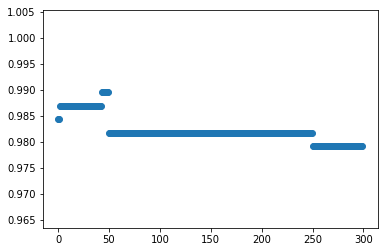

In [36]:
npscores = np.array(scores[:300])
plt.scatter(range(len(npscores)), npscores[:,2])

## Try SGD

In [ ]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=200)
sgd.fit(X_train, Y_train)
score = sgd.score(X_test, Y_test)
print(score)

## Try kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
score = knn.score(X_test, Y_test)
print(score)

In [ ]:
Ns = range(3, 30)
scores = np.zeros((len(Ns)))
index = 0
top = (3, 0)
for n in Ns:
    print('%d / %d (%d)' % (index, len(Ns)-1, n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    score = knn.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (n, score)
    index += 1

print('Top:', top)

## Combining Automation

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm

datasets = [
    ('v8', scaled_v8),
    ('v7', scaled_v7),
    ('v6', scaled_v6),
    ('v4', scaled_v4),
    ('Cleaned+MinMaxScaled', minmaxscaled),
    ('Cleaned+Extended+MinMaxScaled', minmaxscaled_ext)
]

options = {
    'AdaBoost': {
        'base_estimator': [
            svm.SVC(kernel='rbf', C=3.65, gamma=0.1),
            RandomForestClassifier(n_estimators=81)
        ],
        'algorithm': ['SAMME']
    },
    'SVM/C': {
        'kernel': ('linear', 'rbf'),
        'C': np.arange(.1, 4.0, .05),
        'gamma': [.1]
    },
    'RandomForest': {
        'n_estimators': range(60, 100)
    },
    'kNN': {
        'n_neighbors': range(2, 15)
    },
    'SGD': {
        'max_iter': [300, 400, 500, 600, 700, 800, 900, 1000]
    }
}

classifiers = [
    ('AdaBoost', AdaBoostClassifier),
    ('SVM/C', svm.SVC),
    ('RandomForest', RandomForestClassifier),
    ('kNN', KNeighborsClassifier),
    ('SGD', linear_model.SGDClassifier)
]

def search(classifiers, options, datasets, test_size, random_state):
    results = {
        'rank': [],
        'classifier': [],
        'options': [],
        'dataset': [],
        'score': []
    }

    for dataset in datasets:
        X_train, X_test, Y_train, Y_test = train_test_split(dataset[1].iloc[:,:-1], dataset[1].iloc[:,-1],\
                                                            test_size=test_size, random_state=random_state)
        
        for classifier in classifiers:
            name = classifier[0]
            print 'Testing', dataset[0], 'on', name, '...'

            model = GridSearchCV(classifier[1](), options[name], verbose=1, n_jobs=-1, cv=3)
            model.fit(X_train, Y_train)
            
            print 'Params:', model.best_params_
            print 'MSE:', model.best_score_
            print
            
            results['rank'].append(0)
            results['classifier'].append(name)
            results['options'].append(str(model.best_params_))
            results['dataset'].append(dataset[0])
            results['score'].append(model.best_score_)

    return results

results = search(classifiers, options, datasets, .20, 123456)

Testing v8 on AdaBoost ...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.2min finished


Params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'algorithm': 'SAMME'}
MSE: 0.969401041667

Testing v8 on SVM/C ...
Fitting 3 folds for each of 156 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:   37.0s finished


Params: {'kernel': 'rbf', 'C': 1.0000000000000004, 'gamma': 0.1}
MSE: 0.979817708333

Testing v8 on RandomForest ...
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.6s finished


Params: {'n_estimators': 88}
MSE: 0.974609375

Testing v8 on kNN ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    3.0s remaining:    0.4s


Params: {'n_neighbors': 4}
MSE: 0.973958333333

Testing v8 on SGD ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   13.5s finished


Params: {'max_iter': 400}
MSE: 0.95703125

Testing v7 on AdaBoost ...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   57.5s finished


Params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'algorithm': 'SAMME'}
MSE: 0.967447916667

Testing v7 on SVM/C ...
Fitting 3 folds for each of 156 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:   35.7s finished


Params: {'kernel': 'rbf', 'C': 1.2000000000000004, 'gamma': 0.1}
MSE: 0.98046875

Testing v7 on RandomForest ...
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   27.5s finished


Params: {'n_estimators': 99}
MSE: 0.975911458333

Testing v7 on kNN ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Params: {'n_neighbors': 4}
MSE: 0.973958333333

Testing v7 on SGD ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   10.7s finished


Params: {'max_iter': 600}
MSE: 0.957682291667

Testing v6 on AdaBoost ...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   56.4s finished


Params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'algorithm': 'SAMME'}
MSE: 0.9609375

Testing v6 on SVM/C ...
Fitting 3 folds for each of 156 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:   29.1s finished


Params: {'kernel': 'rbf', 'C': 3.8000000000000012, 'gamma': 0.1}
MSE: 0.983072916667

Testing v6 on RandomForest ...
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   31.4s finished


Params: {'n_estimators': 78}
MSE: 0.969401041667

Testing v6 on kNN ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    2.0s remaining:    0.2s


Params: {'n_neighbors': 1}
MSE: 0.97265625

Testing v6 on SGD ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   10.4s finished


Params: {'max_iter': 700}
MSE: 0.948567708333

Testing v4 on AdaBoost ...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.0min finished


Params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'algorithm': 'SAMME'}
MSE: 0.955078125

Testing v4 on SVM/C ...
Fitting 3 folds for each of 156 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:   32.4s finished


Params: {'kernel': 'rbf', 'C': 1.7000000000000006, 'gamma': 0.1}
MSE: 0.977864583333

Testing v4 on RandomForest ...
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.6s finished


Params: {'n_estimators': 83}
MSE: 0.96484375

Testing v4 on kNN ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    2.2s remaining:    0.3s


Params: {'n_neighbors': 1}
MSE: 0.968098958333

Testing v4 on SGD ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   10.3s finished


Params: {'max_iter': 300}
MSE: 0.948567708333

Testing Cleaned+MinMaxScaled on AdaBoost ...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   33.7s finished


Params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'algorithm': 'SAMME'}
MSE: 0.947916666667

Testing Cleaned+MinMaxScaled on SVM/C ...
Fitting 3 folds for each of 156 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   15.8s


Params: {'kernel': 'linear', 'C': 3.4500000000000011, 'gamma': 0.1}
MSE: 0.96484375

Testing Cleaned+MinMaxScaled on RandomForest ...
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:   18.7s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   43.2s finished


Params: {'n_estimators': 72}
MSE: 0.951171875

Testing Cleaned+MinMaxScaled on kNN ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.7s finished


Params: {'n_neighbors': 1}
MSE: 0.956380208333

Testing Cleaned+MinMaxScaled on SGD ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    9.6s finished


Params: {'max_iter': 500}
MSE: 0.951822916667

Testing Cleaned+Extended+MinMaxScaled on AdaBoost ...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


Params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'algorithm': 'SAMME'}
MSE: 0.9609375

Testing Cleaned+Extended+MinMaxScaled on SVM/C ...
Fitting 3 folds for each of 156 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:   35.0s finished


Params: {'kernel': 'rbf', 'C': 2.9000000000000008, 'gamma': 0.1}
MSE: 0.981770833333

Testing Cleaned+Extended+MinMaxScaled on RandomForest ...
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.1s finished


Params: {'n_estimators': 93}
MSE: 0.965494791667

Testing Cleaned+Extended+MinMaxScaled on kNN ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Params: {'n_neighbors': 3}
MSE: 0.970052083333

Testing Cleaned+Extended+MinMaxScaled on SGD ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   12.9s finished


Params: {'max_iter': 400}
MSE: 0.950520833333



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm

datasets = [
    ('v8', scaled_v8),
    ('v7', scaled_v7),
    ('v6', scaled_v6),
    ('v4', scaled_v4),
    ('Cleaned+MinMaxScaled', minmaxscaled),
    ('Cleaned+Extended+MinMaxScaled', minmaxscaled_ext)
]

options = {
    'SVM/C': {
        'kernel': ['rbf'],
        'C': np.arange(.1, 4.0, .05),
        'gamma': np.arange(.1, 2.0, .05)
    },
    'kNN': {
        'n_neighbors': range(2, 15)
    }
}

classifiers = [
    ('SVM/C', svm.SVC),
    ('kNN', KNeighborsClassifier)
]

def search(classifiers, options, datasets, test_size, random_state):
    results = {
        'rank': [],
        'classifier': [],
        'options': [],
        'dataset': [],
        'score': []
    }

    for dataset in datasets:
        X_train, X_test, Y_train, Y_test = train_test_split(dataset[1].iloc[:,:-1], dataset[1].iloc[:,-1],\
                                                            test_size=test_size, random_state=random_state)
        
        for classifier in classifiers:
            name = classifier[0]
            print 'Testing', dataset[0], 'on', name, '...'

            model = GridSearchCV(classifier[1](), options[name], verbose=1, n_jobs=-1, cv=3)
            model.fit(X_train, Y_train)
            
            print 'Params:', model.best_params_
            print 'MSE:', model.best_score_
            print
            
            results['rank'].append(0)
            results['classifier'].append(name)
            results['options'].append(str(model.best_params_))
            results['dataset'].append(dataset[0])
            results['score'].append(model.best_score_)

    return results

results = search(classifiers, options, datasets, .20, 0)

Testing v8 on SVM/C ...
Fitting 3 folds for each of 2964 candidates, totalling 8892 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min


In [ ]:
results_df = pd.DataFrame(results).sort_values(['score'], ascending=[False])
results_df['rank'] = pd.Series(range(1, len(results_df) + 1), index=results_df.index)
results_df[['rank', 'classifier', 'options', 'dataset', 'score']].to_csv('../classifiers/results_20181110151634_20_0.csv', sep=',', encoding='utf-8', index=False)

## Confusion Matrix

('Accuracy', 0.99479166666666663)


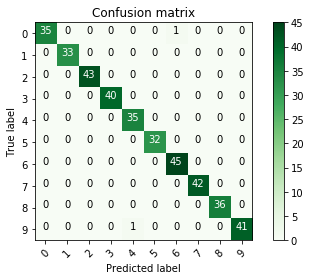

In [170]:
from sklearn.metrics import confusion_matrix
import itertools

best = svm.SVC(kernel='rbf', C=3.65, gamma=0.1)
X_train, X_test, Y_train, Y_test = split(scaled_v8, .20)
Y_pred = best.fit(X_train, Y_train).predict(X_test)

def plot_confusion_matrix(cm, classes):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

print('Accuracy', best.score(X_test, Y_test))
plot_confusion_matrix(cnf_matrix, classes=range(0,10))

plt.show()